# Stock vs Index hurst index estimation - Log S-fbm model

### Done by : Othmane ZARHALI

# Importations

In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes"))

import matplotlib.pyplot as plt
from math import log
import warnings
warnings.filterwarnings("ignore")

from DataAcquisition import *
from GMMCalibration import *
from LogSfbmModel import *

# Oxford Man institute realized volatility acquisition

In [2]:
File_path = "/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes/oxfordmanrealizedvolatilityindices.csv"
realized_vol_data_obj_ox = DataAcquisition('OxfordManInstitute',File_path)

In [3]:
realized_vol_data_obj_ox.IndicesCharging()
indices_list = realized_vol_data_obj_ox.indices_list
vol_dataset = realized_vol_data_obj_ox.dataframe_indices
print(vol_dataset)

         index                 Unnamed: 0 Symbol  close_time  rk_parzen  \
0            0  2000-01-03 00:00:00+00:00   .AEX    163015.0   0.000179   
1            1  2000-01-04 00:00:00+00:00   .AEX    163016.0   0.000423   
2            2  2000-01-05 00:00:00+00:00   .AEX    163016.0   0.000324   
3            3  2000-01-06 00:00:00+00:00   .AEX    163002.0   0.000219   
4            4  2000-01-07 00:00:00+00:00   .AEX    163016.0   0.000155   
...        ...                        ...    ...         ...        ...   
139940  145271  2021-04-05 00:00:00+01:00   .STI    180000.0   0.000004   
139941  145272  2021-04-06 00:00:00+01:00   .STI    180000.0   0.000024   
139942  145273  2021-04-07 00:00:00+01:00   .STI    180000.0   0.000013   
139943  145274  2021-04-08 00:00:00+01:00   .STI    175959.0   0.000009   
139944  145275  2021-04-09 00:00:00+01:00   .STI    180000.0   0.000006   

        open_time  open_price     medrv       rv5        bv  ...    rk_th2  \
0         90101.0    

Indices available

In [4]:
indices_list

['.AEX',
 '.AORD',
 '.BFX',
 '.BSESN',
 '.BVLG',
 '.BVSP',
 '.DJI',
 '.FCHI',
 '.FTMIB',
 '.FTSE',
 '.GDAXI',
 '.GSPTSE',
 '.HSI',
 '.IBEX',
 '.IXIC',
 '.KS11',
 '.KSE',
 '.MXX',
 '.N225',
 '.NSEI',
 '.OMXC20',
 '.OMXHPI',
 '.OMXSPI',
 '.OSEAX',
 '.RUT',
 '.SMSI',
 '.SSEC',
 '.SSMI',
 '.STI']

##### Log vol computation

##### Let's consider two indices : NSEI and STI

In [5]:
log_vols_NSEI = realized_vol_data_obj_ox.GetlogVol(".NSEI",'bv',True,True,False,0,0)
log_vols_STI = realized_vol_data_obj_ox.GetlogVol(".STI",'bv',True,True,False,0,0)
print(log_vols_NSEI,log_vols_STI)

[ -9.09583846  -8.42565538  -8.41514315 ...  -9.20799311 -10.37571292
 -11.10107484] [-10.85806965 -10.23129018  -9.93152778 ...  -9.97600644  -9.8917955
  -9.86773188]


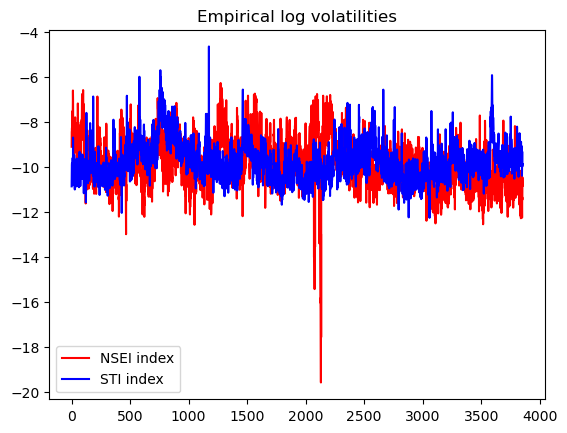

In [6]:
min_length = min(len(log_vols_NSEI),len(log_vols_STI))
time_line = np.arange(min_length)
plt.plot(time_line,log_vols_NSEI[:min_length], color='red',label='NSEI index')
plt.plot(time_line,log_vols_STI[:min_length], color='blue',label='STI index')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

##### Log vol statistics

##### Numerical tests -  NSEI

In [7]:
# NSEI
logvolvariance_overall_with_lag_NSEI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_NSEI)
print(logvolvariance_overall_with_lag_NSEI)

(array([   8,    9,   12,   14,   18,   22,   28,   34,   42,   52,   64,
         79,   98,  120,  148,  183,  226,  278,  343,  422,  521,  642,
        791,  975, 1201, 1480, 1824, 2248, 2770, 3413, 4206, 5183]), array([0.35842535, 0.37524941, 0.41599062, 0.4381994 , 0.47550027,
       0.50773756, 0.54964531, 0.58411015, 0.62014323, 0.65322222,
       0.6802255 , 0.7074864 , 0.73739737, 0.76633661, 0.79322425,
       0.81666472, 0.83875362, 0.86066882, 0.87920371, 0.89422324,
       0.9089994 , 0.92457659, 0.93926288, 0.95923213, 0.98452674,
       1.01168093, 1.04670444, 1.09140392, 1.13095154, 1.16028133,
       1.13001706,        nan]))


In [8]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek('.NSEI')
print(means_and_variance_eachday_in_week)

(array([-9.05457534, -8.70085103, -9.18843551, -9.21880093, -9.81530079]), array([0.78077038, 1.53100143, 0.56212798, 0.51751696, 0.01510113]))


In [9]:
correl = Correlation(log_vols_NSEI,log_vols_NSEI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([1.08385978, 0.78083193, 0.701292  , 0.65365305, 0.61472904,
       0.61077713, 0.55307408, 0.52553815, 0.49779351, 0.49031727,
       0.49593499, 0.45630645, 0.43516446, 0.43246381, 0.41850497,
       0.409631  , 0.37083193, 0.34827862, 0.34972304, 0.33220779,
       0.31701237, 0.28914225, 0.28188284, 0.28132966, 0.28327881,
       0.27685011, 0.26077149, 0.25676326, 0.25973784, 0.2636926 ,
       0.25447167, 0.24994179, 0.2480732 , 0.25472634, 0.25905081,
       0.25614122, 0.24835241, 0.25703416, 0.24836318, 0.25128471,
       0.24110904, 0.23756706, 0.24073382, 0.25230844, 0.26547803,
       0.26772659, 0.26084441, 0.26888187, 0.28068201, 0.26864436,
       0.28446571]))


##### Numerical tests -  STI

In [10]:
# STI
logvolvariance_overall_with_lag_STI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_STI)
print(logvolvariance_overall_with_lag_STI)

(array([   8,    9,   11,   14,   17,   21,   26,   32,   39,   48,   58,
         71,   87,  106,  130,  158,  193,  236,  288,  352,  430,  525,
        641,  782,  955, 1165, 1422, 1736, 2119, 2587, 3157, 3854]), array([0.18273815, 0.18972343, 0.20144343, 0.21593706, 0.22769403,
       0.24095312, 0.25510806, 0.26978724, 0.28439693, 0.30015858,
       0.31527965, 0.33189439, 0.34916642, 0.36677116, 0.38499093,
       0.40253773, 0.42001739, 0.43867449, 0.45920557, 0.48098552,
       0.5068847 , 0.53854361, 0.57256764, 0.60256036, 0.60940972,
       0.61395769, 0.62028397, 0.62769465, 0.63290987, 0.6567422 ,
       0.69929094,        nan]))


In [11]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek(".STI")
print(means_and_variance_eachday_in_week)

(array([-10.85806965, -10.23129018,  -9.93152778,  -9.82895074,
       -10.09268284]), array([1.15224036, 0.19949187, 0.02157454, 0.00196299, 0.09488728]))


In [12]:
correl = Correlation(log_vols_STI,log_vols_STI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([0.65945294, 0.49742405, 0.45827235, 0.44268707, 0.42729325,
       0.42060089, 0.40239439, 0.39835343, 0.39364837, 0.38300065,
       0.38237012, 0.36583987, 0.35021808, 0.35613399, 0.35539619,
       0.34918668, 0.3409036 , 0.33442755, 0.32939468, 0.32731938,
       0.32173866, 0.31295264, 0.31003246, 0.30617113, 0.30392936,
       0.30272755, 0.29056251, 0.2869957 , 0.28180388, 0.27833755,
       0.27958174, 0.27724508, 0.27578545, 0.26964285, 0.27446028,
       0.28156098, 0.2679243 , 0.26988708, 0.26415253, 0.26117487,
       0.26394733, 0.2579122 , 0.25592286, 0.24922336, 0.24350831,
       0.25146695, 0.24683316, 0.23884517, 0.23807632, 0.2312326 ,
       0.23689783]))


# Yahoo finance data acquisition

##### Log vol computation

##### Let's consider two stocks : GOOGL and AMZN

##### GOOGL

In [13]:
realized_vol_data_obj_yf_GOOGL = DataAcquisition('Yahoo finance')

In [14]:
realized_vol_data_obj_yf_GOOGL.IndicesCharging("GOOGL",first_date="1900-01-01",last_date="2034-01-01")
market_data_GOOGL = realized_vol_data_obj_yf_GOOGL.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [15]:
market_data_GOOGL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2022-11-01,95.449997,96.029999,90.370003,90.470001,90.470001,47161400
2022-11-02,90.940002,91.180000,86.879997,86.970001,86.970001,57038300
2022-11-03,86.320000,86.519997,83.339996,83.430000,83.430000,61288000


In [16]:
market_capitalization_GOOGL = realized_vol_data_obj_yf_GOOGL.market_capitalization

In [17]:
signal_test_GOOGL = market_data_GOOGL["Close"]

In [18]:
removed0signal_test_GOOGL = realized_vol_data_obj_yf_GOOGL.removeZeros(np.array(signal_test_GOOGL))
log_vol_estimator_GOOGL = realized_vol_data_obj_yf_GOOGL.ComputeLogVolEstimator()

##### AMZN

In [19]:
realized_vol_data_obj_yf_AMZN = DataAcquisition('Yahoo finance')

In [20]:
realized_vol_data_obj_yf_AMZN.IndicesCharging("AMZN",first_date="1900-01-01",last_date="2034-01-01")
market_data_AMZN = realized_vol_data_obj_yf_AMZN.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [21]:
market_data_AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2022-11-01,103.989998,104.580002,96.059998,96.790001,96.790001,153370000
2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800
2022-11-03,92.470001,93.500000,89.019997,89.300003,89.300003,136683300


In [22]:
market_capitalization_AMZN = realized_vol_data_obj_yf_AMZN.market_capitalization

In [23]:
signal_test_AMZN = market_data_AMZN["Close"]

In [24]:
removed0signal_test_AMZN = realized_vol_data_obj_yf_AMZN.removeZeros(np.array(signal_test_AMZN))
log_vol_estimator_AMZN = realized_vol_data_obj_yf_AMZN.ComputeLogVolEstimator()

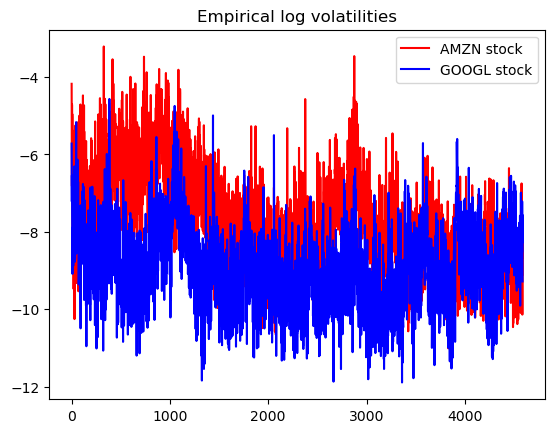

In [25]:
min_length = min(len(log_vol_estimator_AMZN),len(log_vol_estimator_GOOGL))
time_line = np.arange(min_length)
plt.plot(time_line,log_vol_estimator_AMZN[:min_length], color='red',label='AMZN stock')
plt.plot(time_line,log_vol_estimator_GOOGL[:min_length], color='blue',label='GOOGL stock')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

# GMM Calibration

In [26]:
GMM_obj = GMM()

### GMM on indices

##### NSEI

Objective function value after calibration =  0.005103800266207834


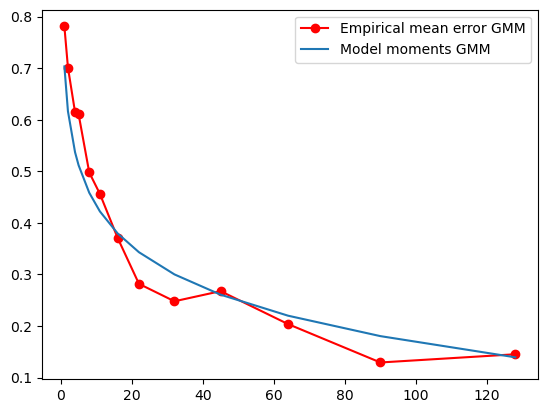

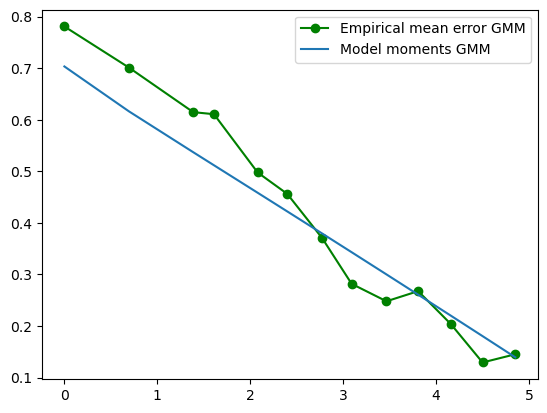

H =  0.0057291444703173825 lambda2 = 0.10926801856007884 T =  1.0716252664623354 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0031764054520594612 J =  26.452996772724262 J_95 =  18.30703805327515
------------------------------------------------------


(0.0057291444703173825,
 0.10926801856007884,
 1.0716252664623354,
 4.5399929762484854e-05,
 0.0031764054520594612,
 26.452996772724262,
 18.30703805327515,
 [array([0.78083193, 0.701292  , 0.61472904, 0.61077713, 0.49779351,
         0.45630645, 0.37083193, 0.28188284, 0.2480732 , 0.26772659,
         0.203828  , 0.12942438, 0.14536152]),
  array([0.70332469, 0.61644459, 0.53707532, 0.51177171, 0.45848254,
         0.42229908, 0.37959653, 0.34317654, 0.30016429, 0.26087228,
         0.22011946, 0.18051758, 0.13944159]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [27]:
calibrated_parameters_NSEI = GMM_obj.ComputeParamsGMM(log_vols_NSEI)
calibrated_parameters_NSEI

##### STI

Objective function value after calibration =  0.0011198642548073128


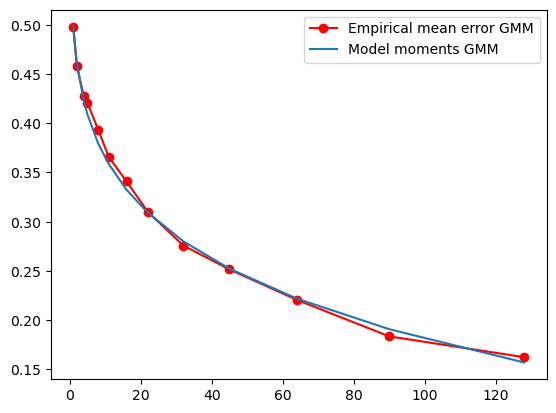

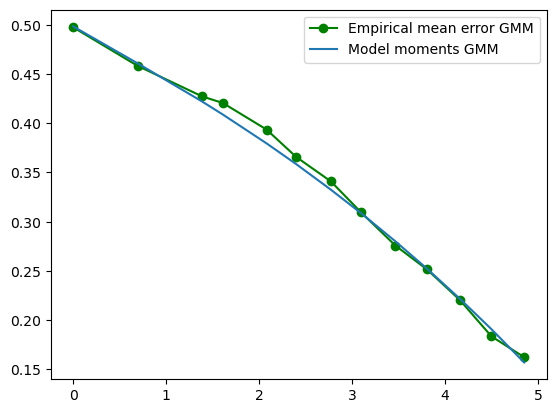

H =  0.076972167347693 lambda2 = 0.03952835398816385 T =  2.6278243571722353 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9319700526550283 J =  4.315956838027383 J_95 =  18.30703805327515
------------------------------------------------------


(0.076972167347693,
 0.03952835398816385,
 2.6278243571722353,
 4.5399929762484854e-05,
 0.9319700526550283,
 4.315956838027383,
 18.30703805327515,
 [array([0.49742405, 0.45827235, 0.42729325, 0.42060089, 0.39364837,
         0.36583987, 0.3409036 , 0.31003246, 0.27578545, 0.25146695,
         0.22053445, 0.18351524, 0.16235613]),
  array([0.49831654, 0.46081518, 0.42208908, 0.40887157, 0.37959705,
         0.35856292, 0.33247639, 0.3091001 , 0.2800925 , 0.25220777,
         0.22182169, 0.19079908, 0.15699248]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [28]:
calibrated_parameters_STI = GMM_obj.ComputeParamsGMM(log_vols_STI)
calibrated_parameters_STI

### GMM on stocks

##### GOOGL

Objective function value after calibration =  0.0012745929678895042


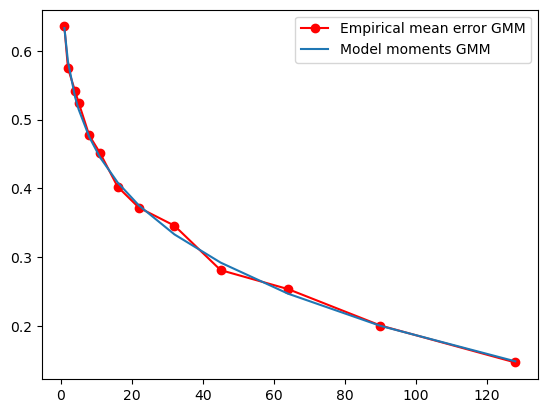

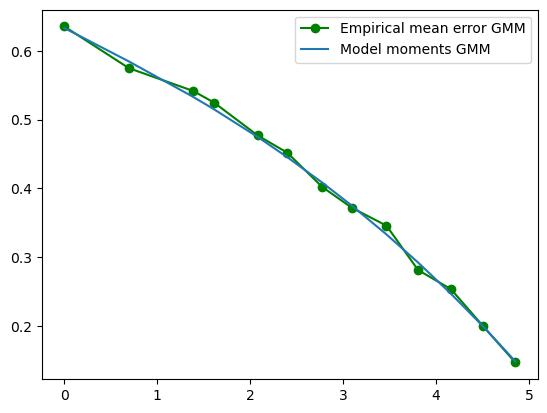

H =  0.09537832176929913 lambda2 = 0.04863779487801645 T =  2.993627487101991 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8278814983953353 J =  5.847832536677045 J_95 =  18.30703805327515
------------------------------------------------------


(0.09537832176929913,
 0.04863779487801645,
 2.993627487101991,
 4.5399929762484854e-05,
 0.8278814983953353,
 5.847832536677045,
 18.30703805327515,
 [array([0.63564739, 0.57503425, 0.541732  , 0.52493647, 0.47704131,
         0.45189519, 0.40226862, 0.37186333, 0.34565884, 0.28098963,
         0.25334033, 0.20033776, 0.14652071]),
  array([0.63336266, 0.58481402, 0.53310153, 0.51514135, 0.47484004,
         0.445458  , 0.40854801, 0.37504796, 0.33294266, 0.29193086,
         0.24666603, 0.19985973, 0.14819783]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [29]:
calibrated_parameters_GOOGL = GMM_obj.ComputeParamsGMM(log_vol_estimator_GOOGL)
calibrated_parameters_GOOGL

##### AMZN

Objective function value after calibration =  0.0008418748318023779


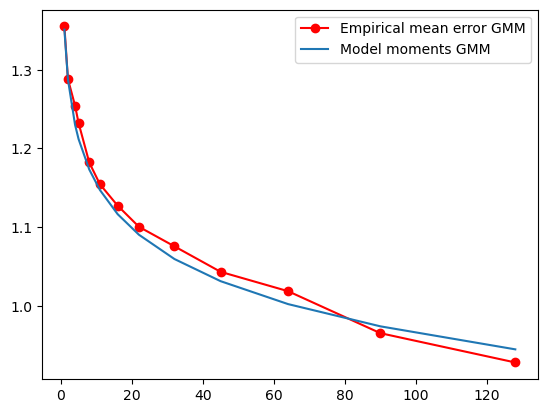

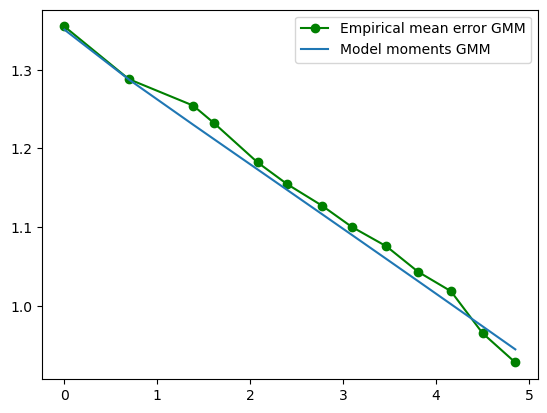

H =  0.003249336457220734 lambda2 = 0.08013237113951968 T =  1.1081299967329257 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8629238472183919 J =  5.399785171180469 J_95 =  18.30703805327515
------------------------------------------------------


(0.003249336457220734,
 0.08013237113951968,
 1.1081299967329257,
 4.5399929762484854e-05,
 0.8629238472183919,
 5.399785171180469,
 18.30703805327515,
 [array([1.35512053, 1.28816064, 1.25445876, 1.23227687, 1.18214983,
         1.1544937 , 1.12720041, 1.10032657, 1.07545307, 1.04305296,
         1.01842594, 0.96502265, 0.92775718]),
  array([1.35111853, 1.28776221, 1.23013399, 1.21180556, 1.17327355,
         1.14716182, 1.11639874, 1.09020679, 1.05932712, 1.03116834,
         1.00201284, 0.97372941, 0.94444356]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [30]:
calibrated_parameters_AMZN = GMM_obj.ComputeParamsGMM(log_vol_estimator_AMZN)
calibrated_parameters_AMZN

### Multiple Stock and indices calibration

### Indices

In [31]:
Indices_test_symbols = ['.AEX','.AORD','.BFX', '.BSESN']

In [32]:
logvol_synthesis_ox = realized_vol_data_obj_ox.LogVolSynthesisOverAssets(Indices_test_symbols)
logvol_synthesis_ox

{'.AEX': array([ -9.363648  ,  -9.2829408 ,  -9.50419861, ..., -10.49494979,
        -10.66919384, -10.78024093]),
 '.AORD': array([ -9.810457  , -10.30105542,  -9.36433307, ...,  -9.88412876,
        -10.28379873, -11.13394767]),
 '.BFX': array([ -9.71483899, -10.46947439, -10.05192215, ..., -10.47888137,
        -10.44993989, -11.10387582]),
 '.BSESN': array([ -8.93322485,  -8.79850441,  -8.76741764, ..., -10.37471496,
        -10.16140705, -10.44435716])}

In [33]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_ox)

Objective function value after calibration =  0.0032210815825441316
H =  0.14739455298747367 lambda2 = 0.03478874834818246 T =  6.330689125490588 lsigma2 = 4.5399929762484854e-05 p-Value=  0.08794816829829626 J =  16.430737152557615 J_95 =  18.30703805327515
------------------------------------------------------
Objective function value after calibration =  0.001775709058769154
H =  0.19043755566642726 lambda2 = 0.01722883840919475 T =  10.211014241445007 lsigma2 = 4.5399929762484854e-05 p-Value=  0.5350379858026036 J =  8.969106455842997 J_95 =  18.30703805327515
------------------------------------------------------
Objective function value after calibration =  0.001592158885945428
H =  0.13658321648161037 lambda2 = 0.03116574378265726 T =  5.573823482479472 lsigma2 = 4.5399929762484854e-05 p-Value=  0.6171156638094241 J =  8.120010318321683 J_95 =  18.30703805327515
------------------------------------------------------
Objective function value after calibration =  0.001221244479094

,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,.AEX,0.147395,0.034789,6.330689,0.000045,0.087948,16.430737,18.307038
1,.AORD,0.190438,0.017229,10.211014,0.000045,0.535038,8.969106,18.307038
2,.BFX,0.136583,0.031166,5.573823,0.000045,0.617116,8.120010,18.307038
3,.BSESN,0.061786,0.052662,2.467283,0.000045,0.810317,6.058594,18.307038


### Stocks

In [34]:
Stocks_test_symbols = ["GOOGL","AAPL","AMZN"]

In [35]:
realized_vol_data_obj_yf= DataAcquisition('Yahoo finance')

In [36]:
logvol_synthesis_yf = realized_vol_data_obj_yf.LogVolSynthesisOverAssets(Stocks_test_symbols)
logvol_synthesis_yf

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'GOOGL': array([-5.72021842, -6.51914773, -7.21603027, ..., -8.281413  ,
        -7.56352142, -9.28229239]),
 'AAPL': array([-11.57375652, -12.94782852, -12.79575501, ...,  -8.44066915,
         -6.48814455,  -8.71435086]),
 'AMZN': array([-4.17546521, -5.44415333, -5.70028569, ..., -7.21512383,
        -6.74468885, -8.36021247])}

In [37]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_yf)

Objective function value after calibration =  0.0012745929678895042
H =  0.09537832176929913 lambda2 = 0.04863779487801645 T =  2.993627487101991 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8278814983953353 J =  5.847832536677045 J_95 =  18.30703805327515
------------------------------------------------------
Objective function value after calibration =  0.0012636736970117915
H =  0.0035310225973618505 lambda2 = 0.08449538036198029 T =  1.0976405264215368 lsigma2 = 4.5399929762484854e-05 p-Value=  0.20465270229997162 J =  13.351976273462046 J_95 =  18.30703805327515
------------------------------------------------------
Objective function value after calibration =  0.0007440017017534993
H =  0.029341814519781843 lambda2 = 0.06896957773346601 T =  2.0793916510270676 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9058772491561595 J =  4.772026914972692 J_95 =  18.30703805327515
------------------------------------------------------


,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,GOOGL,0.095378,0.048638,2.993627,0.000045,0.827881,5.847833,18.307038
1,AAPL,0.003531,0.084495,1.097641,0.000045,0.204653,13.351976,18.307038
2,AMZN,0.029342,0.068970,2.079392,0.000045,0.905877,4.772027,18.307038


#### Conclusion : No surprise !
#### - Single assets have very low estimated hurst index than indices

### Construction of an index from existing stock data

Estimation of its hurst index

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Objective function value after calibration =  0.003483510541230896


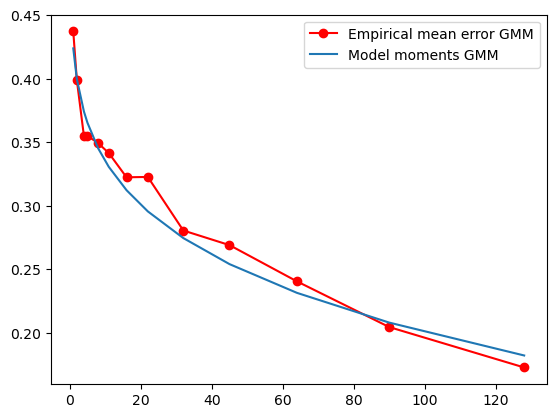

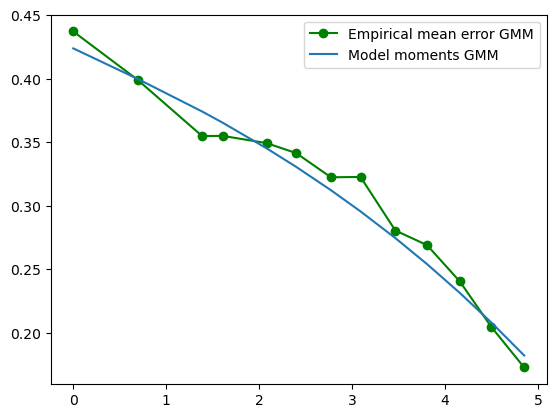

H =  0.09670152629194201 lambda2 = 0.023976981570796762 T =  3.7405539824073983 lsigma2 = 4.5399929762484854e-05 p-Value=  0.3697870064589433 J =  10.84416831485178 J_95 =  18.30703805327515
------------------------------------------------------


(0.09670152629194201,
 0.023976981570796762,
 3.7405539824073983,
 4.5399929762484854e-05,
 0.3697870064589433,
 10.84416831485178,
 18.30703805327515,
 [array([0.4370911 , 0.39901038, 0.35481482, 0.35491014, 0.3492457 ,
         0.34140267, 0.32232726, 0.32259769, 0.28043944, 0.26895132,
         0.24040642, 0.20443442, 0.17264089]),
  array([0.4237947 , 0.39977191, 0.37412675, 0.36520884, 0.3451789 ,
         0.33056059, 0.31218   , 0.29548219, 0.27447587, 0.25399572,
         0.23137097, 0.20795428, 0.18208467]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [50]:
weights = [0.25,0.25,0.5]
Stocks_test_synthindex_symbols = ["TSLA","AAPL","NVDA"]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(Stocks_test_synthindex_symbols,weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Objective function value after calibration =  0.0021264311683101213


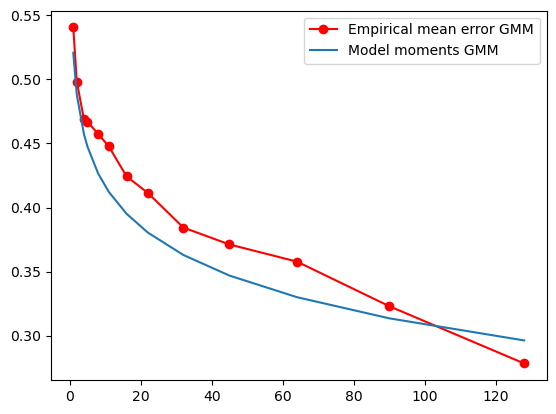

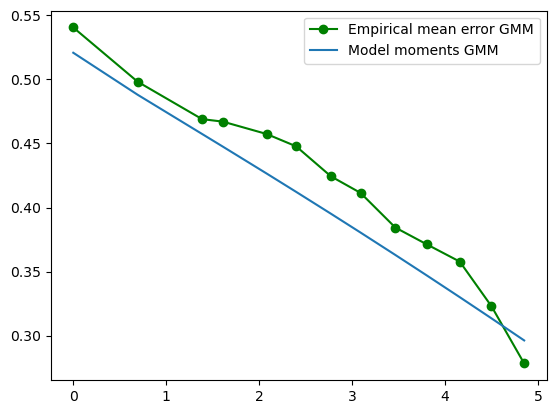

H =  0.01745961984172345 lambda2 = 0.04014052898811783 T =  1.4334369924555896 lsigma2 = 4.5399929762484854e-05 p-Value=  0.02569806524785215 J =  20.398854197598993 J_95 =  18.30703805327515
------------------------------------------------------


(0.01745961984172345,
 0.04014052898811783,
 1.4334369924555896,
 4.5399929762484854e-05,
 0.02569806524785215,
 20.398854197598993,
 18.30703805327515,
 [array([0.54050166, 0.49815887, 0.46899342, 0.46705636, 0.45743285,
         0.44779618, 0.42437114, 0.41145723, 0.38441879, 0.37121451,
         0.35784717, 0.32306679, 0.27838274]),
  array([0.52078739, 0.48799519, 0.45741816, 0.44755907, 0.42662324,
         0.4122745 , 0.39520173, 0.38052166, 0.36304269, 0.34694085,
         0.330104  , 0.31360907, 0.29636045]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [51]:
weights = [0.25,0.25,0.5]
Stocks_test_synthindex_symbols = ["UNH","CMCSA","BAC"]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(Stocks_test_synthindex_symbols,weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

# Mutlidimensional S-fbm model generation

- ### Sanity check: 1 dimensional S fbm

In [11]:
size = 4000
S_fbm_model = Sfbm(0.2,0.068970 ,log(2.079392))   
Sfbmcorrelation = S_fbm_model.SfbmCorrelation(size)
S_fbm_model_generation_example = S_fbm_model.GenerateSfbm(size)
S_fbm_model_logvolgeneration_example = S_fbm_model.GeneratelogVol(size)
S_fbm_model_logvolgeneration_example_qv = S_fbm_model_logvolgeneration_example[0]
print(S_fbm_model_logvolgeneration_example_qv)

[-0.26019659 -0.05120089 -0.3343377  ...  0.47436239 -1.09491909
  0.18658174]


Objective function value after calibration =  0.002766023350717069


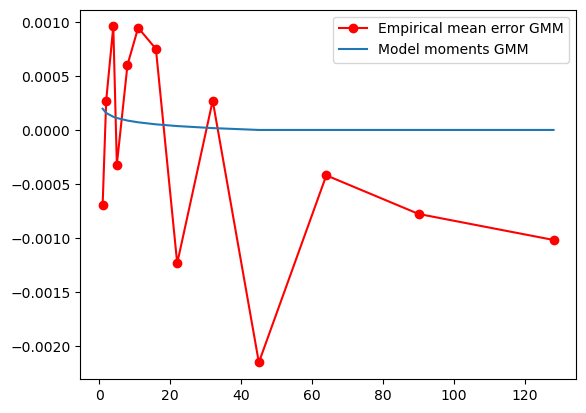

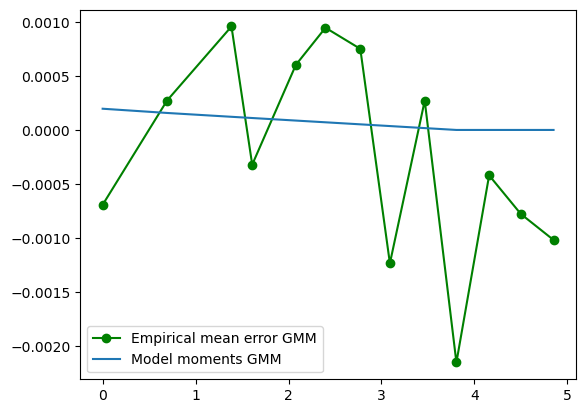

H =  0.000992831398244629 lambda2 = 4.973629209910917e-05 T =  1.0075873053489268 lsigma2 = 4.5399929762484854e-05 p-Value=  0.35276004421256696 J =  11.061327379517332 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_param1d =  (0.000992831398244629, 4.973629209910917e-05, 1.0075873053489268, 4.5399929762484854e-05, 0.35276004421256696, 11.061327379517332, 18.30703805327515, [array([-0.00069135,  0.00027171,  0.00095581, -0.00032069,  0.00060159,
        0.00094411,  0.00074912, -0.00123202,  0.0002709 , -0.00214795,
       -0.00041944, -0.00077598, -0.00101625]), array([1.96074303e-04, 1.56950382e-04, 1.21504262e-04, 1.10255316e-04,
       8.66441928e-05, 7.06725092e-05, 5.18852835e-05, 3.59147304e-05,
       1.71152924e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [12]:
GMM_1d = GMM()
index_estimatedGMM_param1d = GMM_1d.ComputeParamsGMM(S_fbm_model_logvolgeneration_example_qv,5,LagSignal=np.array([1, 2, 4, 5, 8, 11, 16, 22, 32, 45, 64, 90, 128]),
                         GMM_Method=1)
print("index_estimatedGMM_param1d = ", index_estimatedGMM_param1d)

- ### 2 dimensional S fbm

#### Model construction and H estimate

Objective function value after calibration =  0.09261147664120278


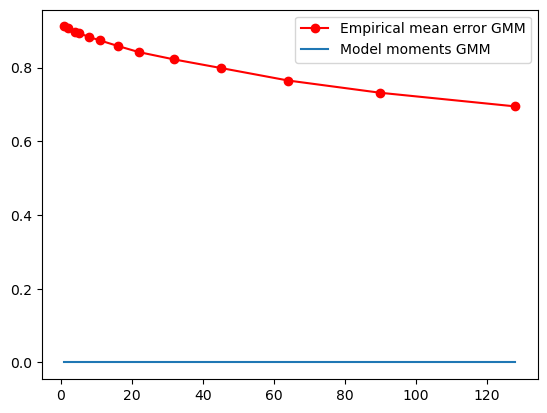

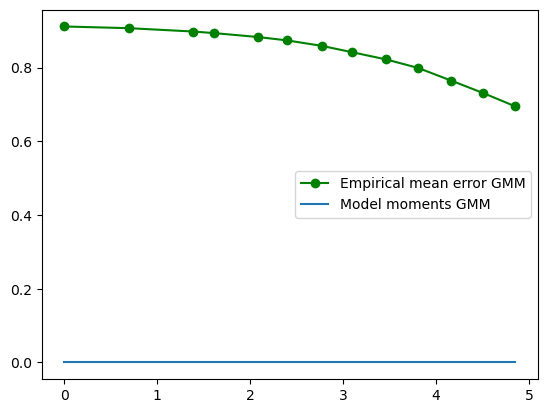

H =  0.8045736442992418 lambda2 = 0.0003101597076713412 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.8142232960513813e-73 J =  370.44590656481114 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_paramSfbms =  (0.8045736442992418, 0.0003101597076713412, 22026.465794806718, 4.5399929762484854e-05, 1.8142232960513813e-73, 370.44590656481114, 18.30703805327515, [array([0.91140556, 0.90679764, 0.89771616, 0.89347102, 0.88289463,
       0.87362643, 0.85867136, 0.8418582 , 0.82183257, 0.79888365,
       0.7648574 , 0.73154333, 0.69461008]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [58]:
dimension = 1
Hs = [0.025 for i in range(dimension)]
weights = np.random.randint(0, 10, dimension)

weights = weights / np.sum(weights)

Sfbms = [Sfbm(H=Hs[i]) for i in range(dimension)]
MultidimensionalSfbms = MultidimensionalSfbm(Sfbms)
Sfbms_generation_example = MultidimensionalSfbms.GenerateMultidimensionalSfbm(4000)
# print(S_fbm_model_mutlidimensionalgeneration_example)
index_builder_Sfbms = MultidimensionalSfbms.Index_Builder(weights, Sfbms_generation_example,
                                                          'mrm and mrw')
log_vol_index_generation_direct_Sfbms = MultidimensionalSfbms.GeneratelogVolMultidimSfbm_Index(weights,
                                                                                               'quadratic variation estimate',
                                                                                               4000)

GMM_index = GMM()
index_estimatedGMM_paramSfbms = GMM_index.ComputeParamsGMM(log_vol_index_generation_direct_Sfbms)
print("index_estimatedGMM_paramSfbms = ", index_estimatedGMM_paramSfbms)